In [12]:
import mysql.connector

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="08023256300",
    database="sales_db",
    allow_local_infile=True  # 👈 THIS IS IMPORTANT
)

cursor = conn.cursor()

cursor.execute("""
LOAD DATA LOCAL INFILE 'C:/Users/USER/Desktop/python/DATA/sample_sales_data.csv'
INTO TABLE sales
FIELDS TERMINATED BY ','
LINES TERMINATED BY '\n'
IGNORE 1 ROWS
(Order_ID, Product_Name, Quantity, Unit_Price, Customer_Location, Product_Category, Total_Revenue)
""")

conn.commit()

In [13]:
cursor.execute("SELECT * FROM sales")

for row in cursor:
    print(row)
    break

('ORD1000', 'MonitorWireless Mouse', 9, Decimal('129019.00'), Decimal('1161171.00'), 'Abuja', 'Accessories')


In [14]:
%pwd

'c:\\Users\\USER\\Desktop\\python\\data_analysis_with_python'

In [15]:
import pandas as pd

sales = pd.read_csv("../DATA/sample_sales_data.csv")
# print(sales.head())
print(sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Order_ID           50 non-null     object
 1   Product_Name       50 non-null     object
 2   Quantity           50 non-null     int64 
 3   Unit_Price         50 non-null     int64 
 4   Customer_Location  50 non-null     object
 5   Product_Category   50 non-null     object
 6   Total_Revenue      50 non-null     int64 
dtypes: int64(3), object(4)
memory usage: 2.9+ KB
None


In [16]:
sales['Revenue'] = sales['Total_Revenue']

sales.head()  


,Order_ID,Product_Name,Quantity,Unit_Price,Customer_Location,Product_Category,Total_Revenue,Revenue
0,ORD1000,MonitorWireless Mouse,9,129019,Abuja,Accessories,1161171,1161171
1,ORD1001,Tablet,3,70726,Enugu,Electronics,212178,212178
2,ORD1002,Headphones,9,146564,Ibadan,Mobile Devices,1319076,1319076
3,ORD1003,Headphones,2,120668,Enugu,Mobile Devices,241336,241336
4,ORD1004,Tablet,2,11102,Abuja,Electronics,22204,22204


In [17]:
sales.drop(columns=['Total_Revenue'], inplace=True)

In [18]:
sales.head(5)


,Order_ID,Product_Name,Quantity,Unit_Price,Customer_Location,Product_Category,Revenue
0,ORD1000,MonitorWireless Mouse,9,129019,Abuja,Accessories,1161171
1,ORD1001,Tablet,3,70726,Enugu,Electronics,212178
2,ORD1002,Headphones,9,146564,Ibadan,Mobile Devices,1319076
3,ORD1003,Headphones,2,120668,Enugu,Mobile Devices,241336
4,ORD1004,Tablet,2,11102,Abuja,Electronics,22204


In [19]:
sales.to_csv('../DATA/clean_sales.csv',index=False)

2. Total Revenue Analysis:
    - Calculate the total revenue generated by the company.
    - Visualize the revenue distribution using a histogram or bar chart.

In [20]:
total_revenue = sales['Revenue'].sum()
print(total_revenue)

22044889


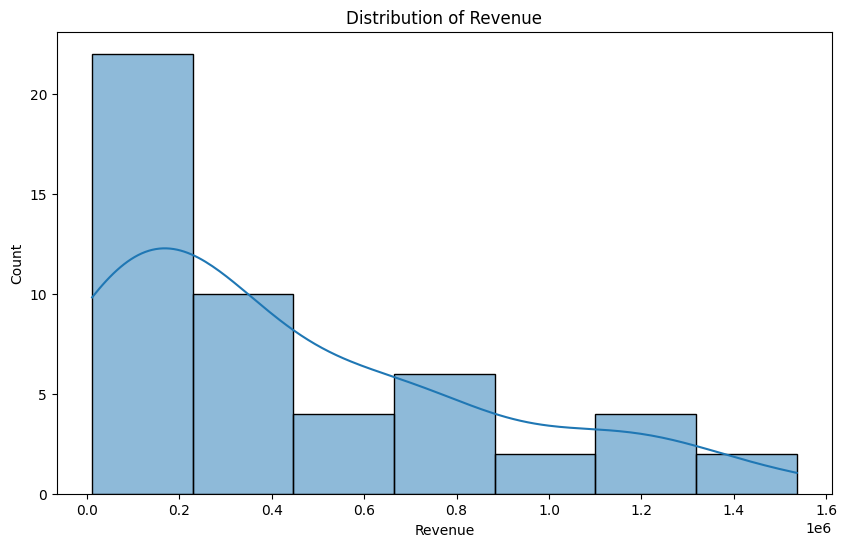

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(data=sales,x='Revenue',kde=True)
plt.title('Distribution of Revenue')
plt.show()


3. Top-Selling Products:
    - Calculate the total revenue for each product.
    - Rank products by revenue and identify the top 5 products with the highest sales.
    - Visualize the results using a bar chart or Pareto chart.


In [36]:
Trevenue_by_product = sales.groupby('Product_Category')['Revenue'].sum().reset_index()
Trevenue= Trevenue_by_product.sort_values(by='Revenue',ascending=False)
Trevenue.head()


,Product_Category,Revenue
4,Mobile Devices,6603011
0,Accessories,5881125
1,Computers,4107314
3,Gadgets,3436646
2,Electronics,2016793


In [37]:
# rank the products by revenue
Trevenue_by_product.rank(axis='columns',ascending=False, numeric_only=True)
Trevenue_by_product.head()

# Trevenue_by_prdt.rank(axis='columns',ascending=False)
# Trevenue_by_prdt.head()

,Product_Category,Revenue
0,Accessories,5881125
1,Computers,4107314
2,Electronics,2016793
3,Gadgets,3436646
4,Mobile Devices,6603011


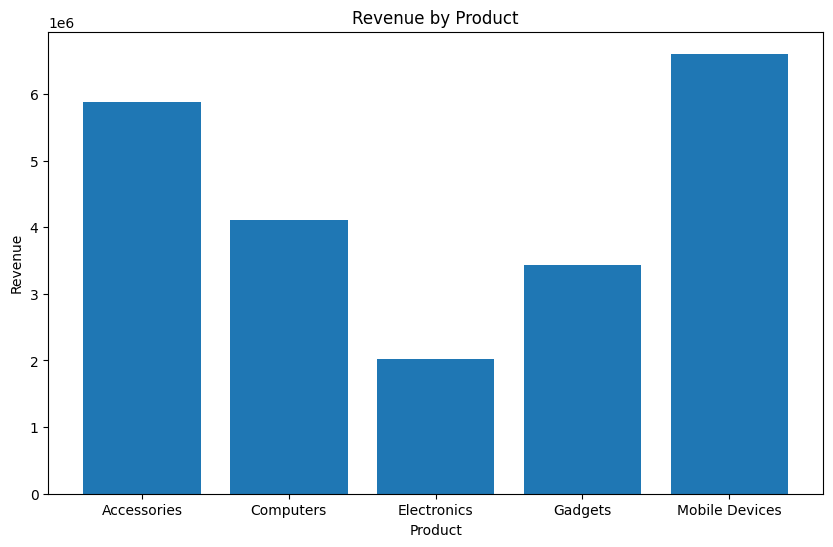

In [38]:
plt.figure(figsize=(10,6))
bars = plt.bar(Trevenue_by_product['Product_Category'],Trevenue_by_product['Revenue'])
plt.title('Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.show()



- Rank products by revenue and identify the top 5 products with the highest sales.
    - Visualize the results using a bar chart or Pareto chart.

In [39]:

# Calculate cumulative percentage
Trevenue_by_product['Cumulative_Percentage'] = (Trevenue_by_product['Revenue'].cumsum() / Trevenue_by_product['Revenue'].sum()) * 100
Trevenue_by_product.head()


,Product_Category,Revenue,Cumulative_Percentage
0,Accessories,5881125,26.677952
1,Computers,4107314,45.309545
2,Electronics,2016793,54.458120
3,Gadgets,3436646,70.047429
4,Mobile Devices,6603011,100.000000


In [74]:
# helps to reveal the top performing products and the cumulative percentage of revenue 
# helps to identify the 80/20 rule, helps to prioritize efforts on high-impact areas
# helps to focus on the most profitable products


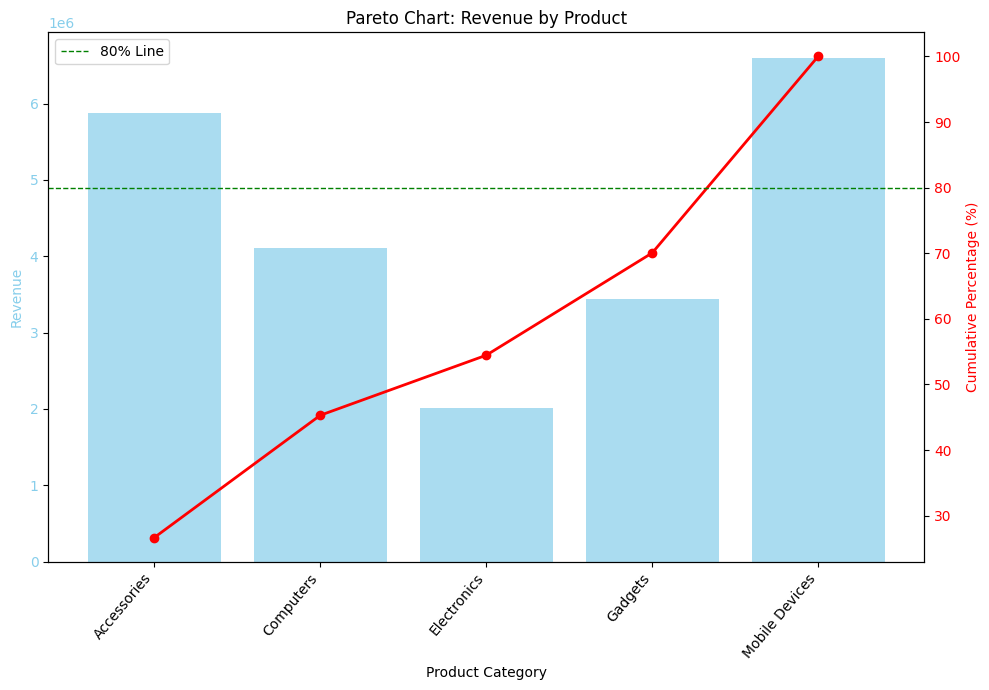

In [75]:

# Create Pareto chart
fig, ax1 = plt.subplots(figsize=(10, 7))

# Bar chart for revenue
ax1.bar(Trevenue_by_product['Product_Category'], Trevenue_by_product['Revenue'], color='skyblue', alpha=0.7)
ax1.set_xlabel('Product Category')
ax1.set_ylabel('Revenue', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title('Pareto Chart: Revenue by Product')

# Rotate x-axis labels for readability
plt.xticks(rotation=50, ha='right')

# Secondary y-axis for cumulative percentage
ax2 = ax1.twinx()
ax2.plot(Trevenue_by_product['Product_Category'], Trevenue_by_product['Cumulative_Percentage'], color='red', marker='o', linewidth=2)
ax2.set_ylabel('Cumulative Percentage (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add horizontal line at 80% for 80/20 rule
ax2.axhline(y=80, color='green', linestyle='--', linewidth=1, label='80% Line')
ax2.legend()

plt.tight_layout()
plt.show()